# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print("Data loaded")

Data loaded


In [2]:
### To start off let's do a basic data summary.
import numpy as np

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
# This is a pickled dataset in which we've already resized the images to 32x32
image_width = 32
image_height = 32
color_channels = 3
image_shape = [None, image_width, image_height, color_channels]

# TODO: how many classes are in the dataset
# we can get the number of classes from the testing set, like this:
all_classes = np.unique(test['labels'])
n_classes = len(all_classes)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [None, 32, 32, 3]
Number of classes = 43


Samples from train data:


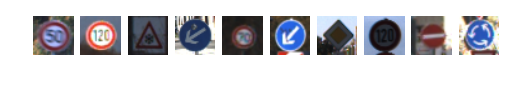

Samples from test data:


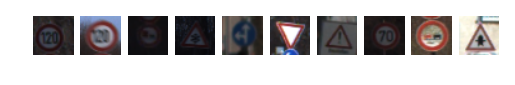

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

# get images from the dataset and display them
# Do relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#makes sure the plt is dispayed inline with the output of the notebook
%matplotlib inline 

def getRandomImageSet(source_list, size_sample):
    index = np.random.choice(len(source_list), size=size_sample, replace=False)
    result = []
    for id in index:
        result.append(source_list[id])
    return result

def plotImageSet(image_list,color='gnuplot2'):
    fig = plt.figure()
    count = 1
    for image in image_list:
        ax = fig.add_subplot(1,len(image_list),count)
        imgplot = plt.imshow(image,cmap=color)
        ax.axis('off')
        count = count +1
    plt.show()
        
# get random samples from X_train
train_samples = getRandomImageSet(X_train, 10)

# get random samples from X_test
test_samples = getRandomImageSet(X_test, 10)

print("Samples from train data:")
plotImageSet(train_samples)

print("Samples from test data:")
plotImageSet(test_samples)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
# test one_hot encoder (from Confluence page by Mihail Chirita)
def one_hot_encoder(original_labels, number_of_classes):
    encoded_labels = np.zeros((len(original_labels), number_of_classes))
    for i in range(len(original_labels)):
        encoded_labels[i, original_labels[i]] = 1.
    return encoded_labels

A = [1,4,5,2,7]
B = one_hot_encoder(A,8)
print(A)
print(B)

[1, 4, 5, 2, 7]
[[ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]


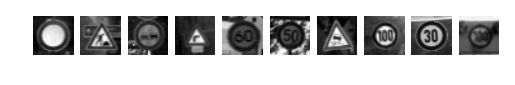

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# convert images to grayscale

import numpy as np
from numpy import newaxis
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

# convert train data to grayscale to reduce complexity and make the mean zero
X_train_gray = []
for image in X_train:
    X_train_gray.append((rgb2gray(image)-128)/128,);

#do the same for the test data
X_test_gray = []
for image in X_test:
    X_test_gray.append((rgb2gray(image)-128)/128,);

# Apply one_hot_encoder to labels
y_train = one_hot_encoder(y_train, n_classes)
y_test = one_hot_encoder(y_test, n_classes)

# debug only ------------------------------------------------------------------------------
# get some random samples from X_train_gray
gray_samples = getRandomImageSet(X_train_gray, 10)
plotImageSet(gray_samples,'gray')

#print(np.max(X_test_gray[21]))
#print(np.min(X_test_gray[21]))

# reshape image set
X_train_gray = np.reshape(X_train_gray, (n_train,32,32,1))
X_test_gray = np.reshape(X_test_gray, (n_test,32,32,1))

### Question 1 

_Describe the techniques used to preprocess the data._



**Answer:**

The convertion to grayscale images reduces the complexity of the data while retaining the interesting features like shapes and symbols. If we, humans, are able to label the traffic sign with this reduced information, we expect the neural network to be also able to do it. In fact, reducing the dimensionality from 3 colors to 1, besides making it much more efficient and easier to train, can potentially increase the performance as the color is sometimes source of problems and causing "distraction". The structure of the data is kept and complexity is reduced.

Images were converted to grayscale by using the rgb2gray function. In order to further improve the preprocessing of the dataset, the mean was brought to about zero by subtracting 128 to the pixel value.
Also, values were normalised to small values betweeen -1 and 1 by dividing by 128.

Other methods could be used to preprocess the data such as adjusting the contrast and brightness or aplying Gaussian blur, but I'm not sure if that would really be of benefit to the convolutional neural network. As such I decided to use just the simplest and probably the most useful techniques: RGB to grayscale convertion, zero mean and normalisation to small values.

In [6]:
# test train_test_split
import numpy as np
from sklearn.model_selection import train_test_split

X1, y1 = np.arange(10).reshape((5, 2)), range(5)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)
print("train = ",X1_train)
print("X_test = ",X1_test)
print ("y_train = ",y1_train)
print ("y_test = ",y1_test)

train =  [[4 5]
 [0 1]
 [6 7]]
X_test =  [[2 3]
 [8 9]]
y_train =  [2, 0, 3]
y_test =  [1, 4]


In [7]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

print ("size of X_train = ",len(X_train_gray))
print ("size of y_train = ",len(y_train))
X_train_gray, X_valid, y_train, y_valid = train_test_split(X_train_gray, y_train, test_size=0.1, random_state=42)
print ("size of new X_train = ",len(X_train_gray))
print ("size of new y_train = ",len(y_train))
print ("size of new X_valid = ",len(X_valid))
print ("size of new y_valid = ",len(y_valid))

size of X_train =  39209
size of y_train =  39209
size of new X_train =  35288
size of new y_train =  35288
size of new X_valid =  3921
size of new y_valid =  3921


In [8]:
print ("size of new X_test = ",len(X_test))
print ("size of new y_test = ",len(y_test))

size of new X_test =  12630
size of new y_test =  12630


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**
All the images of the dataset should be of equal size and in order to be able to use them together with the provided dataset they should be of same size (32x32) and image color depth (3).
In fact, since at this point we already preprocees the original dataset and we have now only gray images, there is only one dimension for color depth.
I've separated the data in 3 sets: training, test and validation data.
The validation set was taken from the original training set. A fraction of 10% of that original training set is now the validation set and the remaining 90% is still part of the training data.
The testing data is bigger than the validation set and should account for almost 30% of the total dataset.
I have split both the data images and the labels using the train_test_split function.

As we used the preprocesses images we don't need to apply the same preprocessing techniques, rgb to grayscale conversion and make the mean zero, because they are already in the correct format.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
My Architecture is composed of:

1) Convolution 1:
    input = 32x32x1;
    feature map = 1;
    patch = (5x5);
    output depth = 32;
    output = 32x32x32;
    
   Max Pooling (down-sampling):
    stride = (2,2);
    Padding = 'SAME';
    output = 32x32x32;
    
2) Convolution 2:
    input = 32x32x32;
    feature map = 1;
    patch = (5x5);
    output depth = 64;
    output = 32x32x64;
    
   Max Pooling (down-sampling):
    stride = (2,2);
    Padding = 'SAME';
    output = 32x32x64;
    
3) Convolution 3:
    input = 32x32x64;
    feature map = 1;
    patch = (5x5);
    output depth = 128;
    output = 32x32x128;
    
   Max Pooling (down-sampling):
    stride = (2,2);
    Padding = 'SAME';
    output = 32x32x128;

5) Fully connected layer:
    number of layers = 256;
    input = 131072x1 (32*32*128);
    output = 256x1;
    
    Relu activator:
    output = 256x1;
    
6) Fully connected layer 1:
    number of layers = 256;
    input = 256x1;
    output = 256x1;
    
    Relu activator:
    output = 256x1;
    
    Apply Dropout:
    keep_prob = 0.75 (meaning 25% are dropped each iteration);
    
    Flatten layer;
    
7) Fully connected layer 2:
    number of layers = 256;
    input = 256x1;
    output = 256x1;
    
    Relu activator:
    output = 256x1;
    
    Apply Dropout;
    keep_prob = 0.75 (meaning 25% are dropped each iteration);
    
8) Output Prediction
    Input = 256x1;
    Output = 43x1 (43 classes);

In [9]:
# define and test the next_batch function
# this function assumes both arrays are the same length
def next_batch(first_array, second_array, batch_size):
    index = np.random.choice(len(first_array), size=batch_size, replace=False)
    
    result_x = []
    result_y = []
    for id in index:
        result_x.append(first_array[id])
        result_y.append(second_array[id])
    return result_x, result_y

# debug only
A = [1,2,3,4,5,6,7,8,9,13]
B = [11,22,33,44,55,66,77,88,99,31]
a,b = next_batch(A,B,4)
print (a,'\n',b)

[4, 9, 8, 3] 
 [44, 99, 88, 33]


In [10]:
### Train your model here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

#Parameters
learning_rate = 0.05
training_iters = 50
batch_size = 128
display_step = 1

# Network Parameters
layer_width = {
    'layer_1': 32,
    'layer_2': 64,
    'layer_3': 128,
    'fully_connected': 256
}
n_input = 4 * 4 * layer_width['layer_3']

weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [5, 5, 1, layer_width['layer_1']],stddev=0.1)),
    'layer_2': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_1'], layer_width['layer_2']],stddev=0.1)),
    'layer_3': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_2'], layer_width['layer_3']],stddev=0.1)),
    'fully_connected_1': tf.Variable(tf.truncated_normal(
        [n_input, layer_width['fully_connected']],stddev=0.1)),
    'fully_connected_2': tf.Variable(tf.truncated_normal(
        [n_input, layer_width['fully_connected']],stddev=0.1)),
    'out': tf.Variable(tf.truncated_normal(
        [layer_width['fully_connected'], n_classes],stddev=0.1))
}

biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_width['layer_3'])),
    'fully_connected_1': tf.Variable(tf.zeros(layer_width['fully_connected'])),
    'fully_connected_2': tf.Variable(tf.zeros(layer_width['fully_connected'])),
    'out': tf.Variable(tf.zeros(n_classes))
}


# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x,
                          ksize=[1, k, k, 1],
                          strides=[1, k, k, 1],
                          padding='SAME')

# Create model
def conv_net(x, weights, biases):
    # Reshape input picture
    #x = tf.reshape(x, shape=[1, 32, 32, 1])

    # Convolution Layer
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)
    
    # Convolution Layer
    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    # Max Pooling (down-sampling)
    conv3 = maxpool2d(conv3, k=2)
    
    # Fully connected layer
    # Reshape conv3 output to fit fully connected layer input
    fc1 = tf.reshape(conv3, [-1, weights['fully_connected_1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['fully_connected_1']), biases['fully_connected_1'])
    fc1 = tf.nn.relu(fc1)
    
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # flatten layer
    fc1_flat = tf.reshape(fc1, [-1, n_input])
    
    # 2nd fully connected layer
    fc2 = tf.add(tf.matmul(fc1_flat, weights['fully_connected_2']), biases['fully_connected_2'])
    fc2 = tf.nn.relu(fc2)
    
    # Apply Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

print ("Model created")

Model created


In [11]:
# --------------------------------------------------------------

# tf Graph input
x = tf.placeholder("float", [None, 32, 32, 1])
y = tf.placeholder("float", [None, n_classes])
keep_prob = tf.placeholder(tf.float32)

logits = conv_net(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)\
    .minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

# Add ops to save and restore all the variables.
saver = tf.train.Saver() # stores all graph variables

print ("All set. Ready to run.")

All set. Ready to run.


In [13]:
# Session
# Now let's run it
print ("Training the network. This might take a few minutes...")

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_iters):
        total_batch = int(n_train/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = next_batch(X_train_gray, y_train, batch_size)

            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.75})
            
        # Display logs per epoch step
        c = sess.run(cost, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.75})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
    print("Optimization Finished!")
    
    # Save the variables to disk.
    save_path = saver.save(sess, "model.ckpt")
    print("Model saved in file: %s" % save_path)
    
    # Test model
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
    # we need to reshape test data
    validation_data = X_valid  #np.reshape(X_valid, (n_test,32,32,1))
    validation_labels = y_valid
    
    print("Accuracy:", accuracy.eval({x: validation_data, y: validation_labels, keep_prob: 1.0}))
    

Training the network. This might take a few minutes...
Epoch: 0001 cost= 1.242955208
Epoch: 0002 cost= 0.492989838
Epoch: 0003 cost= 0.272028327
Epoch: 0004 cost= 0.113022588
Epoch: 0005 cost= 0.099441715
Epoch: 0006 cost= 0.073441453
Epoch: 0007 cost= 0.050353274
Epoch: 0008 cost= 0.040612530
Epoch: 0009 cost= 0.043220941
Epoch: 0010 cost= 0.012122612
Epoch: 0011 cost= 0.051277198
Epoch: 0012 cost= 0.005494879
Epoch: 0013 cost= 0.012738953
Epoch: 0014 cost= 0.017339479
Epoch: 0015 cost= 0.008014824
Epoch: 0016 cost= 0.009471946
Epoch: 0017 cost= 0.020407569
Epoch: 0018 cost= 0.006716114
Epoch: 0019 cost= 0.009675227
Epoch: 0020 cost= 0.030929886
Epoch: 0021 cost= 0.009604650
Epoch: 0022 cost= 0.003713590
Epoch: 0023 cost= 0.009524813
Epoch: 0024 cost= 0.007652990
Epoch: 0025 cost= 0.001447561
Epoch: 0026 cost= 0.001022830
Epoch: 0027 cost= 0.009440131
Epoch: 0028 cost= 0.002960735
Epoch: 0029 cost= 0.027502730
Epoch: 0030 cost= 0.002477615
Epoch: 0031 cost= 0.002454620
Epoch: 0032 cos

In [14]:
# Check accuracy on validation data
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "model.ckpt")
    print("Model restored.")
    
    # we need to reshape test data
    validation_data = X_valid
    validation_labels = y_valid
    
    print("Accuracy:", accuracy.eval({x: validation_data, y: validation_labels, keep_prob: 1.0}))    

Model restored.
Accuracy: 0.989543


In [16]:
# Check Accuracy on test data
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "model.ckpt")
    print("Model restored.")
    
    # Test model
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
    # we need to reshape test data
    batch_size = 1280 # reduced set to prevent PC from crashing
    test_data, test_labels = next_batch(X_test_gray, y_test, batch_size)
    print("Accuracy:", accuracy.eval({x: test_data, y: test_labels, keep_prob: 1.0}))
    

Model restored.
Accuracy: 0.923437


# Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used a gradient descent optimizer with the following parameters (names are self explanatory):

learning_rate = 0.05

training_iters = 50

batch_size = 128

display_step = 1

keep_prob = 0.75 (for dropout implementation, avoiding overfitting)

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

I tried to use a convolutional neural network because it is best suited to handle statistical invariance for features in images wich might not be properly aligned and centered in the image. For this I used 3 layers of CNNs.
I also wanted to make my model deeper and more capable of handling more complicated problems. As such I included 2 aditional layers of fully connected nn. These layers include Relu units (to make it useful for non-linear problems) and also the dropout technique which helps preventing overfitting and makes the NN more robust as it favours redundancy.
In addition to these ideas I found that the architecture of the paper referenced in the course for traffic classification is very interesting and produced really good results. My architecture follows part of that structure.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

There are  10 images in the folder.


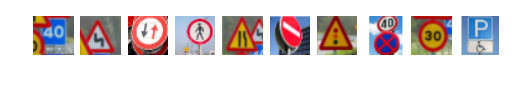

new_treated_images/40.png
new_treated_images/curves.png
new_treated_images/priority.png
new_treated_images/noWalking.png
new_treated_images/narrow.png
new_treated_images/noWay.png
new_treated_images/lights.png
new_treated_images/2signs.png
new_treated_images/30.png
new_treated_images/parking.png


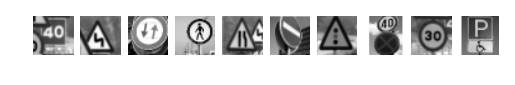

In [18]:
#from PIL import Image
import glob
import cv2
from numpy import array

image_list = []
filename_list = []
for filename in glob.glob('new_treated_images/*.png'):
    filename_list.append(filename)
    im = cv2.imread(filename)
    im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    im = cv2.resize(im,(32,32),interpolation = cv2.INTER_AREA)
    image_list.append(im)

print("There are ",len(image_list),"images in the folder.")
plotImageSet(image_list)

for name in filename_list:
    print(name)

# preprocess the images
image_list_gray = []
for image in image_list:
    image_list_gray.append((rgb2gray(image)-128)/128,);

plotImageSet(image_list_gray,'gray')


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**
I actually provided ten images. See answer above. From these images there are many challenges:

The 'parking.png', '2signs.png' and 'narrow.png' present two signs;

The 'priority.png' is partially cut and in this case the color really matters in order to distinguish which vehicle has the priority.

The 'curves.png' and '40.png' are partially occluded by other signs;

The 'noWalking.png' is not centered;

The 'noWay.png' is tilted.

In [19]:
label_to_name_map = {}
count = 0
with open("signnames.csv", mode='r') as f:
    for line in f:
        parts = line.strip().split(',')
        if parts[0] == 'ClassId':
            continue
        label_to_name_map[int(parts[0])] = parts[1]
        print('Label ',count,' = ',label_to_name_map[count])
        count = count + 1


Label  0  =  Speed limit (20km/h)
Label  1  =  Speed limit (30km/h)
Label  2  =  Speed limit (50km/h)
Label  3  =  Speed limit (60km/h)
Label  4  =  Speed limit (70km/h)
Label  5  =  Speed limit (80km/h)
Label  6  =  End of speed limit (80km/h)
Label  7  =  Speed limit (100km/h)
Label  8  =  Speed limit (120km/h)
Label  9  =  No passing
Label  10  =  No passing for vechiles over 3.5 metric tons
Label  11  =  Right-of-way at the next intersection
Label  12  =  Priority road
Label  13  =  Yield
Label  14  =  Stop
Label  15  =  No vechiles
Label  16  =  Vechiles over 3.5 metric tons prohibited
Label  17  =  No entry
Label  18  =  General caution
Label  19  =  Dangerous curve to the left
Label  20  =  Dangerous curve to the right
Label  21  =  Double curve
Label  22  =  Bumpy road
Label  23  =  Slippery road
Label  24  =  Road narrows on the right
Label  25  =  Road work
Label  26  =  Traffic signals
Label  27  =  Pedestrians
Label  28  =  Children crossing
Label  29  =  Bicycles crossing


Model restored.
[35 21  1 38 24 10 26 20 40 11]


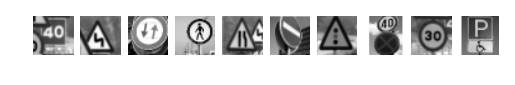

Prediction on  new_treated_images/40.png  is  35  meaning:  Ahead only
Prediction on  new_treated_images/curves.png  is  21  meaning:  Double curve
Prediction on  new_treated_images/priority.png  is  1  meaning:  Speed limit (30km/h)
Prediction on  new_treated_images/noWalking.png  is  38  meaning:  Keep right
Prediction on  new_treated_images/narrow.png  is  24  meaning:  Road narrows on the right
Prediction on  new_treated_images/noWay.png  is  10  meaning:  No passing for vechiles over 3.5 metric tons
Prediction on  new_treated_images/lights.png  is  26  meaning:  Traffic signals
Prediction on  new_treated_images/2signs.png  is  20  meaning:  Dangerous curve to the right
Prediction on  new_treated_images/30.png  is  40  meaning:  Roundabout mandatory
Prediction on  new_treated_images/parking.png  is  11  meaning:  Right-of-way at the next intersection


In [30]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

#reshape image set
image_list_gray_rs = np.reshape(image_list_gray, (10,32,32,1))

plt.ion()
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "model.ckpt")
    print("Model restored.")
    # Test model
    prediction = sess.run(tf.argmax(logits, 1), feed_dict={x:image_list_gray_rs, keep_prob:1.0})                                  
    print (prediction)
    plotImageSet(image_list_gray,'gray')
    count = 0
    for pred in prediction:
        print("Prediction on ",filename_list[count]," is ",pred," meaning: ", label_to_name_map[pred])
        count = count + 1

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

Unfortunatelly my model doesn't perform as well on these captured images. Only 3 out of 10 were correctly labeled.

Model restored.
new_treated_images/40.png


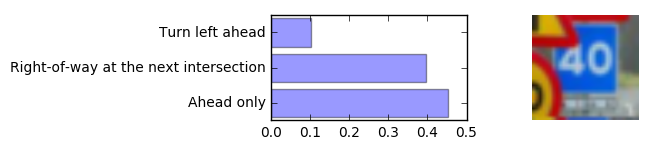

new_treated_images/curves.png


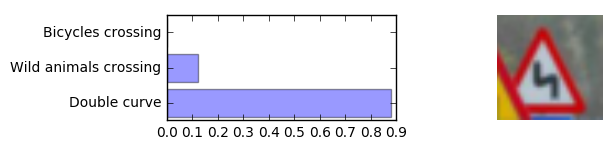

new_treated_images/priority.png


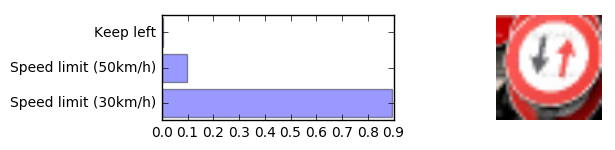

new_treated_images/noWalking.png


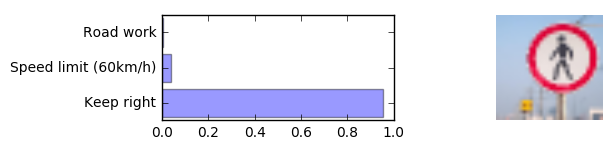

new_treated_images/narrow.png


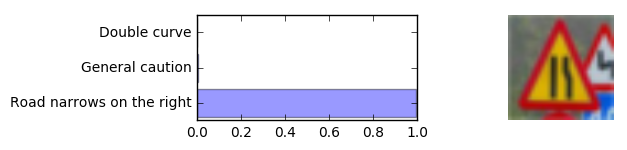

new_treated_images/noWay.png


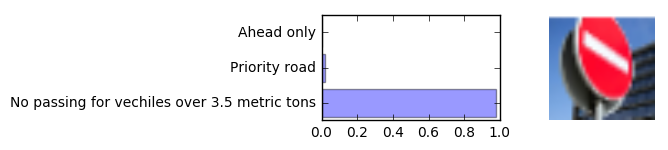

new_treated_images/lights.png


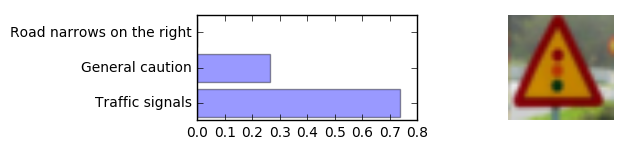

new_treated_images/2signs.png


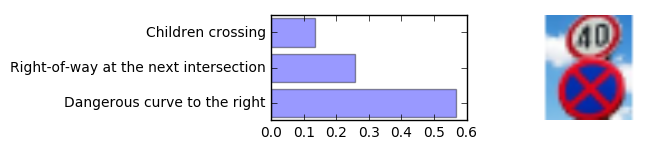

new_treated_images/30.png


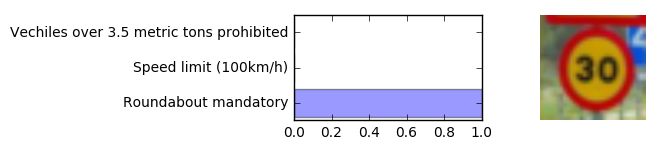

new_treated_images/parking.png


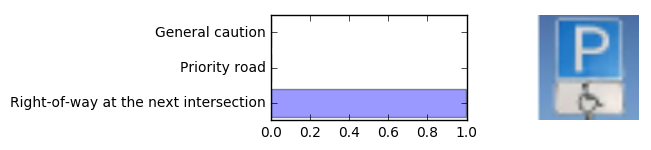

In [31]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
from matplotlib import gridspec;

with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "model.ckpt")
    print("Model restored.")
    # compute softmax probabilities
    softmax = sess.run(tf.nn.softmax(logits), feed_dict={x: image_list_gray_rs, keep_prob: 1.0})
    most_prob,index = tf.nn.top_k(softmax, k = 3)
    most_prob = most_prob.eval()
    index = index.eval()  
    fig = plt.figure()
    count = 1
    
    for i in range(len(most_prob)):        
        
        fig = plt.figure(figsize=(8, 1.6))
        
        gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])
        ax0 = plt.subplot(gs[0])
        ax0.barh(range(len(most_prob[i])), most_prob[i], align='center', alpha=0.4)
        labels = []
        y_pos = range(len(most_prob[i]))
        for j in index[i]:
            labels.append(label_to_name_map[j])
        plt.yticks(y_pos, labels)
        ax1 = plt.subplot(gs[1])
        image = image_list[count-1]
        ax1.imshow(image)
        ax1.axis('off')
        plt.tight_layout()
        plt.grid()
        print(filename_list[count-1])
        count = count +1
        plt.show()
        


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

It is interesting to observe that for those images correctly labeled ('lights.png', 'narrow.png', 'curves.png') the certainty is very high (except for the 'lights.png' where it's only about 0.7 probability).
It is even more interesting (and worring) to observe that 5 of these images (parking.png, 30.png, noWay.png, noWalking.png and priority.png) were incorrectly labeled with a very high certainty!
For all the incorrectly labeled images the correct prediction doesn't appear in the first three results. This means that either our training data is not sufficient (quantity and diversity) to be able to correctly classify these images, or the classes (for some of these images this is the case) are not represented in the initial set.

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

The provided images were previously resized to meet the same dimensions 32x32 pixels.
These images were imported using standard opencv functions, like imread to read the file and cvtColor to convert the color format to RGB.
These images then went to through the same preprocessing as the training set, i.e., conversion to grayscale, zero mean and normalisation.
The classification was done using the softmax and previously determined logits on this new collection of images.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.